In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL 
epochs = 10
file_list = []
class_list = []
batch_size = 64
DATADIR = os.getcwd() + "/dataset"
train_dir = os.getcwd() + "/40_class_train_aug"
val_dir = os.getcwd() + "/40_class_val"

CATEGORIES = [str(i) for i in range(40)] #Simple initial category

IMG_SIZE = 50 



Using TensorFlow backend.


In [2]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255              
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='sparse')
train_label_map = train_data_gen.class_indices

print(train_label_map)



Found 31228 images belonging to 40 classes.
{'class_00': 0, 'class_01': 1, 'class_02': 2, 'class_03': 3, 'class_04': 4, 'class_05': 5, 'class_06': 6, 'class_07': 7, 'class_08': 8, 'class_09': 9, 'class_10': 10, 'class_11': 11, 'class_12': 12, 'class_13': 13, 'class_14': 14, 'class_15': 15, 'class_16': 16, 'class_17': 17, 'class_18': 18, 'class_19': 19, 'class_20': 20, 'class_21': 21, 'class_22': 22, 'class_23': 23, 'class_24': 24, 'class_25': 25, 'class_26': 26, 'class_27': 27, 'class_28': 28, 'class_29': 29, 'class_30': 30, 'class_31': 31, 'class_32': 32, 'class_33': 33, 'class_34': 34, 'class_35': 35, 'class_36': 36, 'class_37': 37, 'class_38': 38, 'class_39': 39}


In [3]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='sparse',
                                                 shuffle=True)
val_label_map = val_data_gen.class_indices

total_train = 31228
total_val = 640

Found 640 images belonging to 40 classes.


In [4]:
model = Sequential() 

model.add(Conv2D(32, (3,3), input_shape = (50, 50, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 40 neurons, for 40 classes
model.add(Dense(40))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy"
              ,optimizer="adam"
              ,metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          3

In [5]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
487/487 [==============================] - 110s 226ms/step - loss: 1.8368 - accuracy: 0.4625 - val_loss: 0.5787 - val_accuracy: 0.7984
Epoch 2/10
487/487 [==============================] - 117s 240ms/step - loss: 0.6250 - accuracy: 0.7843 - val_loss: 0.3957 - val_accuracy: 0.8578
Epoch 3/10
487/487 [==============================] - 113s 231ms/step - loss: 0.4175 - accuracy: 0.8502 - val_loss: 0.4297 - val_accuracy: 0.8469
Epoch 4/10
487/487 [==============================] - 108s 222ms/step - loss: 0.3367 - accuracy: 0.8772 - val_loss: 0.3668 - val_accuracy: 0.8844
Epoch 5/10
487/487 [==============================] - 119s 244ms/step - loss: 0.2711 - accuracy: 0.9009 - val_loss: 0.2895 - val_accuracy: 0.9172
Epoch 6/10
487/487 [==============================] - 117s 241ms/step - loss: 0.2358 - accuracy: 0.9135 - val_loss: 0.3765 - val_accuracy: 0.8984
Epoch 7/10
487/487 [==============================] - 120s 247ms/step - loss: 0.2116 - accuracy: 0.9234 - val_loss: 0.3379 -

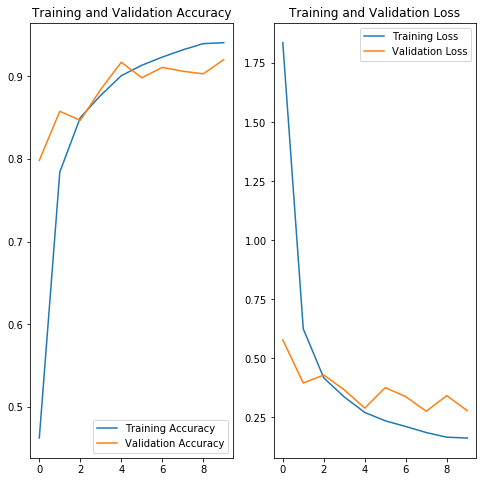

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
!mkdir saved_models
model.save('saved_models/40_aug_model') 

mkdir: saved_models: File exists
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_models/40_aug_model/assets


In [8]:
pred_image_gen_train = ImageDataGenerator(
                    rescale=1./255              
                    )

pred_dir = os.getcwd() + "/sample_data"

pred_data_gen = pred_image_gen_train.flow_from_directory(batch_size=1,
                                                     directory=pred_dir,
                                                     shuffle=False,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode=None
                                                     )


Found 8 images belonging to 1 classes.


In [9]:
model = tf.keras.models.load_model(os.getcwd()+"/saved_models/40_aug_model")




In [10]:
y_pred = model.predict(pred_data_gen)


In [11]:
predictions = model.predict(pred_data_gen)
for i in predictions: 
    value = np.argmax(i)
    for key,val in val_label_map.items():
        if val == value:
            print("Predicted", key , "with", i[value], "confidence.")
    
# Results are different from the ones in the report as the model accidentally been retrained 
# However, all classes are still predicted correctly

Predicted class_05 with 0.97960633 confidence.
Predicted class_06 with 0.99985516 confidence.
Predicted class_12 with 0.9973086 confidence.
Predicted class_14 with 0.94632775 confidence.
Predicted class_23 with 0.8051238 confidence.
Predicted class_28 with 0.48346114 confidence.
Predicted class_33 with 0.98852056 confidence.
Predicted class_36 with 0.97699046 confidence.


In [12]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='sparse',
                                                 shuffle=False)

val_label_map = val_data_gen.class_indices

Y_pred = model.predict_generator(val_data_gen, 640 // batch_size)
y_pred = np.argmax(Y_pred, axis=1)


#cm = (confusion_matrix(val_data_gen.classes, y_pred))
cm = metrics.confusion_matrix(val_data_gen.classes , y_pred)


Found 640 images belonging to 40 classes.


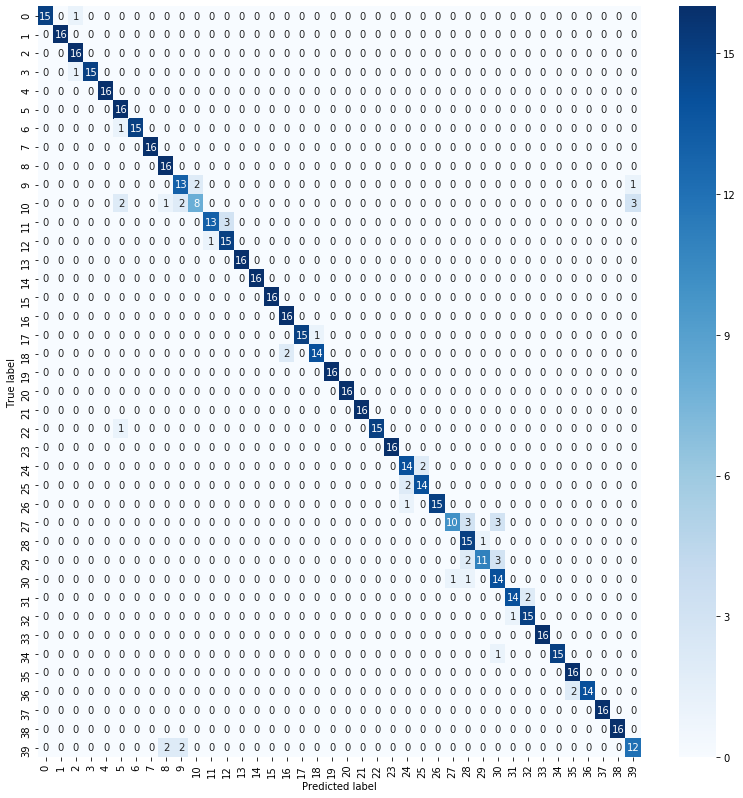

In [14]:
import seaborn as sns
figure = plt.figure(figsize=(11, 11))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("40_class_confmat")
plt.show()
